In [1]:
import pandas as pd 
df1 = pd.read_csv("../../../data/eda_project_data/merge_data/pj_join.csv")

In [2]:
len(df1[df1['키워드']=='자율주행'])
len(df1[df1['키워드']=='딥러닝'])
len(df1[df1['키워드']=='로봇제어'])
len(df1[df1['키워드']=='드론'])
## 15 / 62 / 22 / 4

4

In [4]:
df2 = pd.read_csv('../../../data/eda_project_data/merge_data/pj_difference.csv')

In [5]:
df2 = df2[df2['연봉']!=0]

In [6]:
df2['분야'] = df2['2차산업군']

In [7]:
# 로봇기술사용유무
df2['로봇기술사용유무'] = 'X'
df1['로봇기술사용유무'] = 'O'

In [8]:
df3 = pd.concat([df1,df2])

In [9]:
df3.reset_index(drop=True,inplace=True)

In [10]:
df3.drop(columns=['2차산업군'],inplace=True)

In [11]:
import koreanize_matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

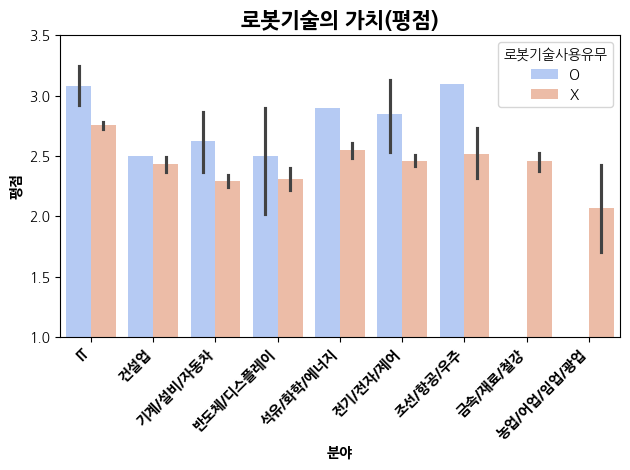

In [12]:
sns.barplot(x='분야', y='평점', hue='로봇기술사용유무', data=df3, palette='coolwarm')
plt.title('로봇기술의 가치(평점)', weight='bold', fontsize=15)
plt.xlabel('분야', weight='bold')
plt.ylabel('평점', weight='bold')
plt.xticks(rotation=45, ha='right', weight='bold')
plt.ylim(1, 3.5)  

plt.tight_layout()
plt.show()

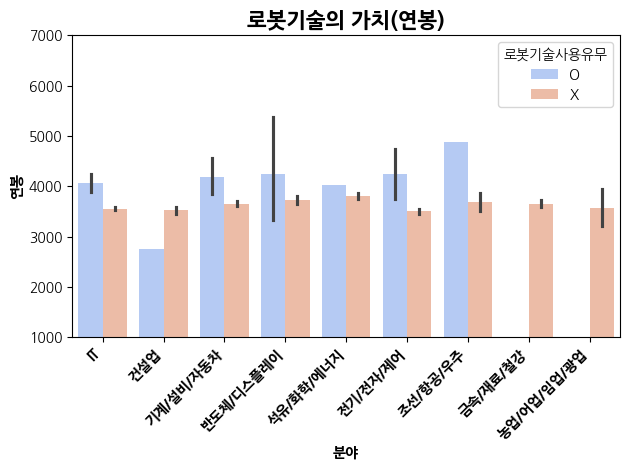

In [13]:
sns.barplot(x='분야', y='연봉', hue='로봇기술사용유무', data=df3, palette='coolwarm')
plt.title('로봇기술의 가치(연봉)', weight='bold', fontsize=15)
plt.xlabel('분야', weight='bold')
plt.ylabel('연봉', weight='bold')
plt.xticks(rotation=45, ha='right', weight='bold')
plt.ylim(1000, 7000)  

plt.tight_layout()
plt.show()

대표기업 선정
1. 전체 취업사이트 크롤링 + 잡플래닛 기업평점 연봉 데이터 활용

In [14]:
# 연봉순으로 top50 기업 선정
df_point = df1.sort_values(by=['연봉'],ascending=False).head(50)

In [15]:
# 평점순으로 top50 기업 선정
df_salary = df1.sort_values(by='평점', ascending=False).head(50)

In [17]:
result1 = pd.merge(df_point,df_salary, on='기업이름',how='inner')
result1 = result1[['기업이름', '키워드_x', '연봉_x', '평점_x', '분야_x', '로봇기술사용유무_x']]
result1.columns = ['기업이름','키워드','연봉','평점','분야','로봇기술사용유무']
result1 = result1.head(10)
result1

,기업이름,키워드,연봉,평점,분야,로봇기술사용유무
0,칩스앤미디어,딥러닝,6577,3.3,반도체/디스플레이,O
1,테서,딥러닝,5990,3.0,IT,O
2,한화비전,딥러닝,5874,3.5,전기/전자/제어,O
3,카카오모빌리티,자율주행,5851,3.7,IT,O
4,딥엑스,딥러닝,5823,4.4,IT,O
5,현대자동차,로봇제어,5745,3.8,기계/설비/자동차,O
6,알세미,딥러닝,5701,4.5,IT,O
7,클레온,딥러닝,5587,3.4,IT,O
8,뉴빌리티,로봇제어,5233,4.0,IT,O
9,크래프톤,딥러닝,5179,3.4,IT,O


/tmp/ipykernel_7519/1914075154.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=result1, x='기업이름', y='연봉', ax=ax1, palette='Set3')
/tmp/ipykernel_7519/1914075154.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


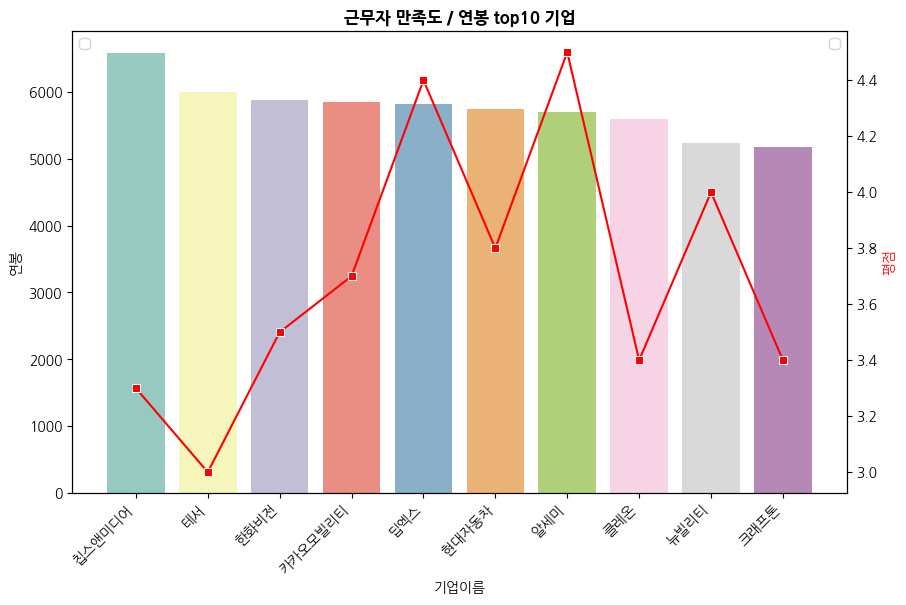

In [18]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))
# Plotting the first y-axis
sns.barplot(data=result1, x='기업이름', y='연봉', ax=ax1, palette='Set3')

# Creating the second y-axis
ax2 = ax1.twinx()
sns.lineplot(data=result1, x='기업이름', y='평점',  marker='s', ax=ax2, color='r')

ax1.set_ylabel('연봉', color='black')
ax2.set_ylabel('평점', color='r')

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('근무자 만족도 / 연봉 top10 기업', fontweight='bold')
plt.show()


2. 매출액데이터를 이용하여 기업의 성장률 분석

In [19]:
df4 = pd.read_csv('../../../data/eda_project_data/매출액/기업성장필터링.csv')
# 순이익 성장지수 = (순이익1 - 순이익3)/순이익3
# 매출액 성장지수 = (매출액1 - 매출액3)/매출액3
# 자본총계 성장지수 = (자본총계1 - 자본총계3)/자본총계3
# 총성장지수 = 순이익성장지수 + 매출액성장지수 + 자본총계성장지수
df4['총성장지수'] = (df4['순이익성장지수']+df4['매출액성장지수']+df4['자본총계성장지수'])

In [20]:
df4 = df4[['기업이름','기업규모','매출액','평균연봉','기준년도','키워드','순이익성장지수','매출액성장지수','자본총계성장지수','총성장지수']]
df4

,기업이름,기업규모,매출액,평균연봉,기준년도,키워드,순이익성장지수,매출액성장지수,자본총계성장지수,총성장지수
0,코가로보틱스,중소기업,37179,4578,2022,자율주행,-23.325974,-0.503923,30.096180,6.266283
1,에바,중소기업,724255,0,2022,자율주행,1.489216,42.950179,2.665656,47.105052
2,뷰런테크놀로지,중소기업,45919,4763,2022,자율주행,25.180346,0.808349,7.603815,33.592510
3,체이시로보틱스,중소기업,55922,2676,2022,자율주행,-14.711628,0.711095,0.143502,-13.857031
4,포티투닷 주식회사,중소기업,330478,7291,2022,자율주행,1.849532,130.874701,0.482728,133.206961
...,...,...,...,...,...,...,...,...,...,...
128,수퍼빈,중소기업,765476,4381,2022,로봇제어,1.554320,3.313878,1.081350,5.949548
129,주식회사 시메이션,중소기업,217194,4115,2022,로봇제어,-2.516917,0.700761,-0.072604,-1.888760
130,한국야스카와전기,중견기업,25024523,6493,2023,로봇제어,0.454992,0.147619,0.110719,0.713330
131,신태진건설,중소기업,781971,0,2022,로봇제어,-1.224711,1.731986,0.030153,0.537429


In [21]:
result2 = df4.sort_values(by='총성장지수',ascending=False).head(30)
result2

,기업이름,기업규모,매출액,평균연봉,기준년도,키워드,순이익성장지수,매출액성장지수,자본총계성장지수,총성장지수
4,포티투닷 주식회사,중소기업,330478,7291,2022,자율주행,1.849532,130.874701,0.482728,133.206961
83,SK플래닛 Tacademy,대기업,27786713,0,2022,딥러닝,120.147244,0.005084,-0.356993,119.795335
55,크래프톤,중견기업,176777581,7160,2022,딥러닝,93.563253,17.522955,3.199111,114.285320
122,프로메카,중소기업,449991,5171,2022,로봇제어,22.330243,3.498830,40.852246,66.681319
1,에바,중소기업,724255,0,2022,자율주행,1.489216,42.950179,2.665656,47.105052
2,뷰런테크놀로지,중소기업,45919,4763,2022,자율주행,25.180346,0.808349,7.603815,33.592510
41,포인드,중소기업,175578,3654,2022,딥러닝,26.475857,0.882470,3.736365,31.094693
50,고스트패스,중소기업,5656,5292,2022,딥러닝,0.086137,30.248619,-0.855217,29.479539
71,와디즈,중소기업,3414284,3339,2022,딥러닝,-0.576422,27.617154,-0.894366,26.146365
40,메디픽셀,중소기업,2727,6092,2021,딥러닝,10.926230,-0.411777,14.412040,24.926492


/tmp/ipykernel_7519/93525004.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=result2, x='기업이름', y='총성장지수', ax=ax1, palette='Set3')
/tmp/ipykernel_7519/93525004.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


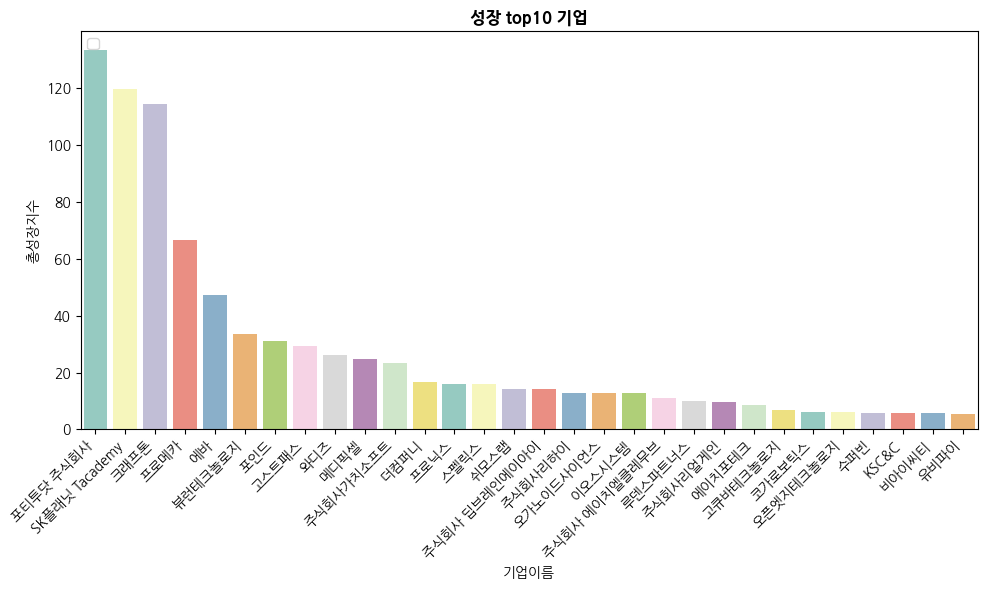

In [22]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))
# Plotting the first y-axis
sns.barplot(data=result2, x='기업이름', y='총성장지수', ax=ax1, palette='Set3')

ax1.set_ylabel('총성장지수', color='black')

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.legend(loc='upper left')

plt.title('성장 top10 기업', fontweight='bold')
plt.tight_layout()
plt.show()


In [23]:
a = df4['순이익성장지수'].mean()
b = df4['매출액성장지수'].mean()
c = df4['자본총계성장지수'].mean()
d = df4['총성장지수'].mean()
print(a,b,c,d)

-11.015085979639654 3.1523144120976494 1.3992076478877213 -6.549065483772941
